In [6]:
import pandas as pd
import numpy as np
#data1 = pd.read_excel('exportANALITICA.xlsx', dtype = str)
#data2 = pd.read_excel('CONJUNTOSERVIDORES.xlsx', dtype = str)

In [23]:
data1 = pd.get_dummies(data1, columns=['ORDEN','NIVEL_INSTITUCION','SUBORDEN','CLASIFICACION_ORGANICA','SECTOR','NATURALEZA_JURIDICA','DEPARTAMENTO','MUNICIPIO'])
data1.head()
data2.head()

,CÓD SIGEP,CARRERA ADMINISTRATIVA FEMENINO,CARRERA ADMINISTRATIVA MASCULINO,Total CARRERA ADMINISTRATIVA,CONTRATO LABORAL FEMENINO,CONTRATO LABORAL MASCULINO,Total CONTRATO LABORAL,ELECCIÓN FEMENINO,ELECCIÓN MASCULINO,Total ELECCIÓN,...,Total SUPERNUMERARIO,TEMPORAL FEMENINO,TEMPORAL MASCULINO,Total TEMPORAL,TRABAJADOR OFICIAL FEMENINO,TRABAJADOR OFICIAL MASCULINO,Total TRABAJADOR OFICIAL,Total general,Debe reportar,Cuota mujeres libre nombramiento
0,0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,SI,0.5
1,0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3226,SI,0.5901639344262295
2,0004,29,10,39,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2117,SI,0.5437441204139228
3,0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1538,SI,0.6041666666666666
4,0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655,SI,0.4563106796116505


In [32]:
data1['COD_INSTITUCION'] = data1['COD_INSTITUCION'].astype(str).str.zfill(4)
data2['CÓD SIGEP'] = data2['CÓD SIGEP'].astype(str).str.zfill(4)

data1 = pd.merge(data1, data2, how='left', left_on='COD_INSTITUCION', right_on='CÓD SIGEP')

In [26]:
data1.to_excel('examplefin.xlsx', sheet_name='example')

In [34]:
data1.to_excel('examplefin1.xlsx', sheet_name='example')

<h2>descripción estadística de los datos </h2>

In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


df = pd.read_excel('examplefin1.xlsx', dtype = str)

In [75]:
print("Filas:",df.shape[0],"Columnas:",df.shape[1])
print("--"*50)
print(df.notnull().sum()/df.shape[0]*100)

Filas: 6403 Columnas: 20
----------------------------------------------------------------------------------------------------
COD_INSTITUCION                            100.000000
NOMBRE                                     100.000000
CATEGORIAMUNI                               99.390911
CLASIFICACION_ORGANICA                     100.000000
NATURALEZA_JURIDICA                        100.000000
ORDEN                                      100.000000
ES_CABEZA_S                                 99.500234
NIVEL_INSTITUCION                          100.000000
TIPO_INSTITUCION                           100.000000
2016                                         9.495549
2017                                        20.162424
2018                                        12.431673
2019                                        31.797595
2020                                        40.215524
TOTAL_PLANTAS                               96.907700
LIBRE NOMBRAMIENTO Y REMOCIÓN FEMENINO      26.190848
LIBRE NOMB

<h2>descripción estadística de los datos </h2>

In [76]:
df2 = df[df['Debe reportar'].notnull()]
print(df2.notnull().sum()/df2.shape[0]*100)

COD_INSTITUCION                            100.000000
NOMBRE                                     100.000000
CATEGORIAMUNI                               99.861735
CLASIFICACION_ORGANICA                     100.000000
NATURALEZA_JURIDICA                        100.000000
ORDEN                                      100.000000
ES_CABEZA_S                                 99.550639
NIVEL_INSTITUCION                          100.000000
TIPO_INSTITUCION                           100.000000
2016                                        14.206706
2017                                        33.218113
2018                                        20.947114
2019                                        55.271345
2020                                        61.078465
TOTAL_PLANTAS                               99.274110
LIBRE NOMBRAMIENTO Y REMOCIÓN FEMENINO      57.967508
LIBRE NOMBRAMIENTO Y REMOCIÓN MASCULINO     56.446595
Total LIBRE NOMBRAMIENTO Y REMOCIÓN         69.512617
Debe reportar               

In [77]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()
df2["CLASIFICACION_ORGANICA_CODE"] = ord_enc.fit_transform(df2[["CLASIFICACION_ORGANICA"]])
df2[["CLASIFICACION_ORGANICA", "CLASIFICACION_ORGANICA_CODE"]].head(4)

ord_enc2 = LabelEncoder()
df2["TIPO_INSTITUCION_CODE"] = ord_enc2.fit_transform(df2[["TIPO_INSTITUCION"]])
df2[["TIPO_INSTITUCION", "TIPO_INSTITUCION_CODE"]].head(4)


C:\Users\MISERIOR\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-77-b94c10203c48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["CLASIFICACION_ORGANICA_CODE"] = ord_enc.fit_transform(df2[["CLASIFICACION_ORGANICA"]])
<ipython-input-77-b94c10203c48>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,TIPO_INSTITUCION,TIPO_INSTITUCION_CODE
3,Vinculación,6
5,Vinculación,6
15,Adscripción,0
16,No Aplica,2


<AxesSubplot:xlabel='TIPO_INSTITUCION_CODE', ylabel='count'>

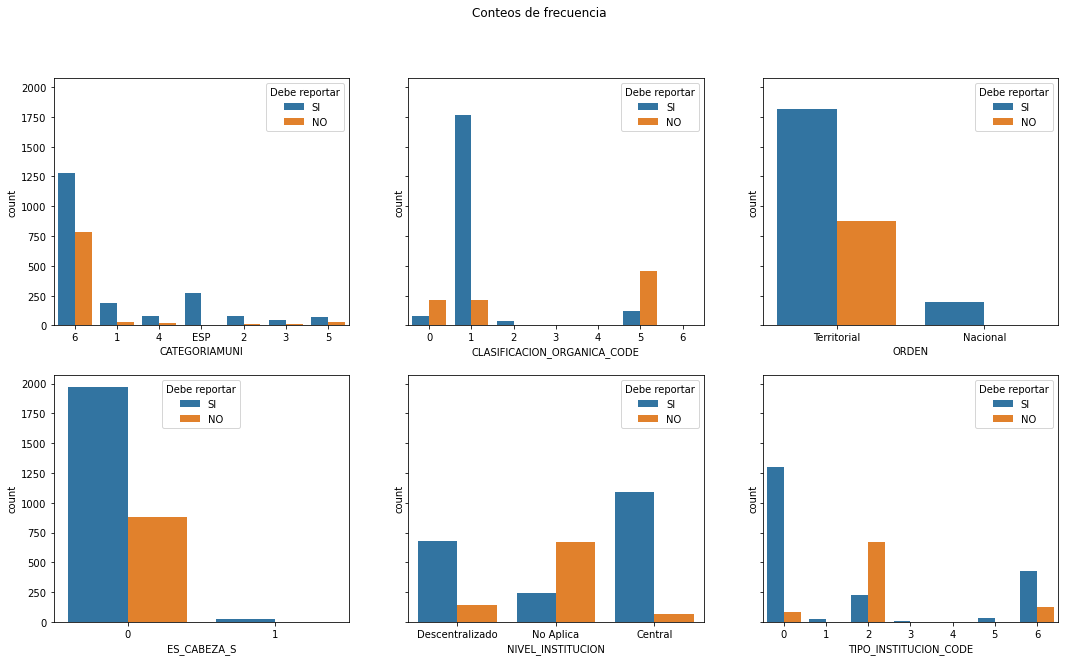

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Conteos de frecuencia')
sns.countplot(ax=axes[0,0], x="CATEGORIAMUNI", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[0,1], x="CLASIFICACION_ORGANICA_CODE", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[0,2], x="ORDEN", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[1,0], x="ES_CABEZA_S", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[1,1], x="NIVEL_INSTITUCION", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[1,2], x="TIPO_INSTITUCION_CODE", hue="Debe reportar", data=df2)

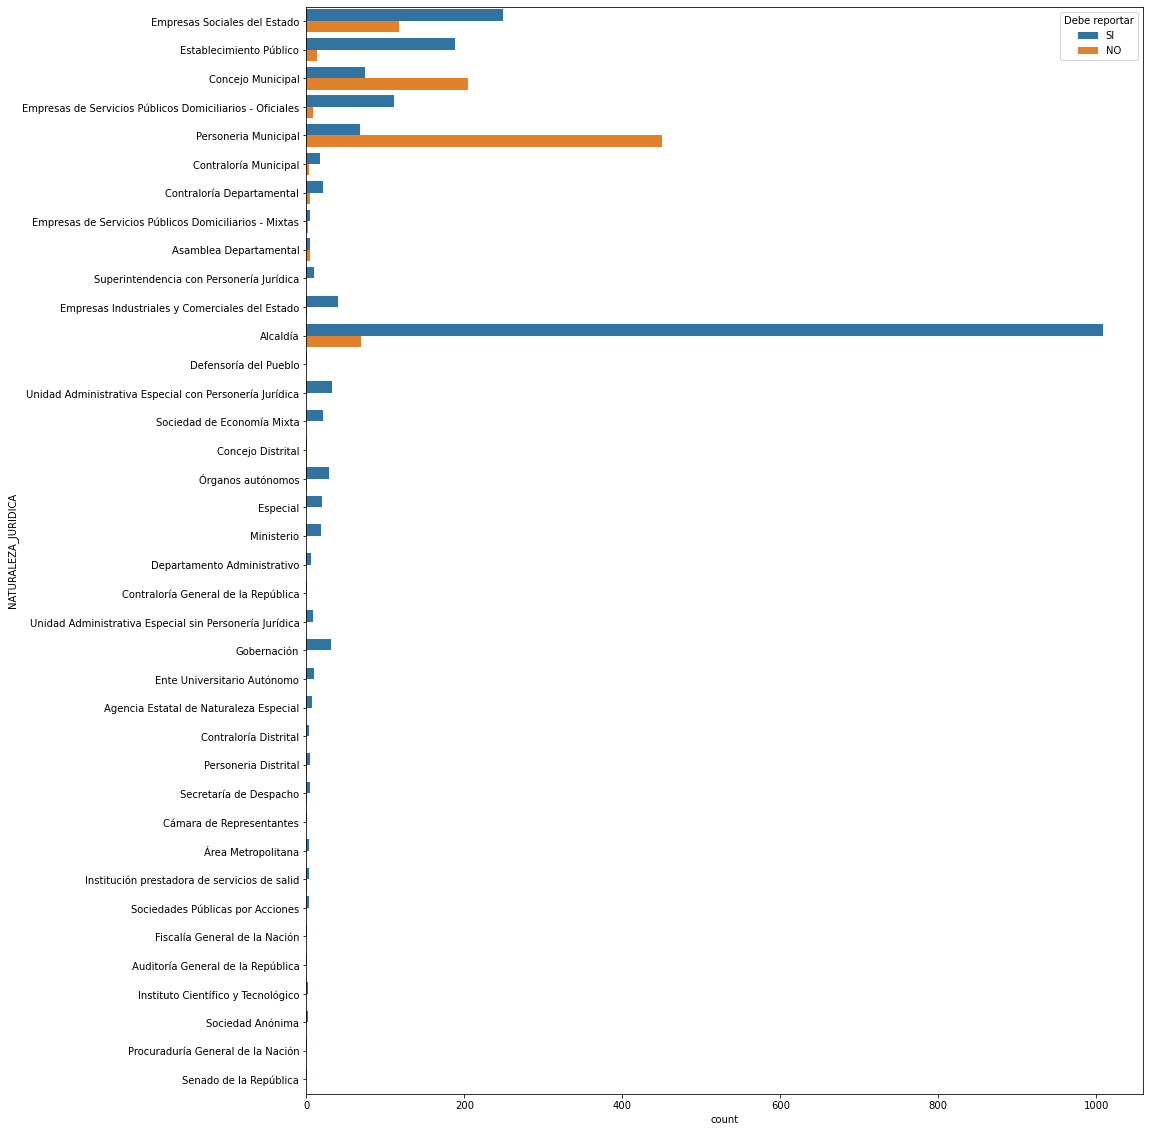

In [79]:
sns.countplot(y="NATURALEZA_JURIDICA", hue="Debe reportar", data=df2)
plt.gcf().set_size_inches(15, 20)

In [82]:
df2.to_excel('prueba.xlsx', sheet_name='example')

COD_INSTITUCION                            100.000000
NOMBRE                                     100.000000
CATEGORIAMUNI                               99.861735
CLASIFICACION_ORGANICA                     100.000000
NATURALEZA_JURIDICA                        100.000000
ORDEN                                      100.000000
ES_CABEZA_S                                 99.550639
NIVEL_INSTITUCION                          100.000000
TIPO_INSTITUCION                           100.000000
2016                                        14.206706
2017                                        33.218113
2018                                        20.947114
2019                                        55.271345
2020                                        61.078465
TOTAL_PLANTAS                               99.274110
LIBRE NOMBRAMIENTO Y REMOCIÓN FEMENINO      57.967508
LIBRE NOMBRAMIENTO Y REMOCIÓN MASCULINO     56.446595
Total LIBRE NOMBRAMIENTO Y REMOCIÓN         69.512617
Debe reportar               

In [80]:
from sklearn.impute import SimpleImputer

#df2['Total LIBRE NOMBRAMIENTO Y REMOCIÓN'] = df2['Total LIBRE NOMBRAMIENTO Y REMOCIÓN'].fillna(value=0)
#df2['LIBRE NOMBRAMIENTO Y REMOCIÓN MASCULINO'] = df2['LIBRE NOMBRAMIENTO Y REMOCIÓN MASCULINO'].fillna(value=0)
#df2['LIBRE NOMBRAMIENTO Y REMOCIÓN FEMENINO'] = df2['LIBRE NOMBRAMIENTO Y REMOCIÓN FEMENINO'].fillna(value=0)

df2['ES_CABEZA_S'] = df2['ES_CABEZA_S'].fillna(df2['ES_CABEZA_S'].mode()[0])
df2['CATEGORIAMUNI'] = df2['CATEGORIAMUNI'].fillna(df2['CATEGORIAMUNI'].mode()[0])

print(df2.notnull().sum()/df2.shape[0]*100)

COD_INSTITUCION                            100.000000
NOMBRE                                     100.000000
CATEGORIAMUNI                              100.000000
CLASIFICACION_ORGANICA                     100.000000
NATURALEZA_JURIDICA                        100.000000
ORDEN                                      100.000000
ES_CABEZA_S                                100.000000
NIVEL_INSTITUCION                          100.000000
TIPO_INSTITUCION                           100.000000
2016                                        14.206706
2017                                        33.218113
2018                                        20.947114
2019                                        55.271345
2020                                        61.078465
TOTAL_PLANTAS                               99.274110
LIBRE NOMBRAMIENTO Y REMOCIÓN FEMENINO      57.967508
LIBRE NOMBRAMIENTO Y REMOCIÓN MASCULINO     56.446595
Total LIBRE NOMBRAMIENTO Y REMOCIÓN         69.512617
Debe reportar               

<ipython-input-80-44053ff7c5f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ES_CABEZA_S'] = df2['ES_CABEZA_S'].fillna(df2['ES_CABEZA_S'].mode()[0])
<ipython-input-80-44053ff7c5f1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CATEGORIAMUNI'] = df2['CATEGORIAMUNI'].fillna(df2['CATEGORIAMUNI'].mode()[0])


In [81]:
df3 = df2.drop(['COD_INSTITUCION','NOMBRE','2016','2017','2018','2019','2020','ESTADO',
                'CLASIFICACION_ORGANICA_CODE','TIPO_INSTITUCION_CODE',
               'LIBRE NOMBRAMIENTO Y REMOCIÓN FEMENINO',
       'LIBRE NOMBRAMIENTO Y REMOCIÓN MASCULINO',
       'Total LIBRE NOMBRAMIENTO Y REMOCIÓN'], axis=1)

In [82]:
df3 = pd.get_dummies(df3, columns=['CATEGORIAMUNI', 'CLASIFICACION_ORGANICA', 'NATURALEZA_JURIDICA',
       'NIVEL_INSTITUCION', 'TIPO_INSTITUCION'])
df3 = pd.get_dummies(df3, columns=['ORDEN'], drop_first=True)

In [83]:
df3 = pd.get_dummies(df3, columns=['Debe reportar'], drop_first=True)

In [84]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df3)
df3[:] = imputer.transform(df3)

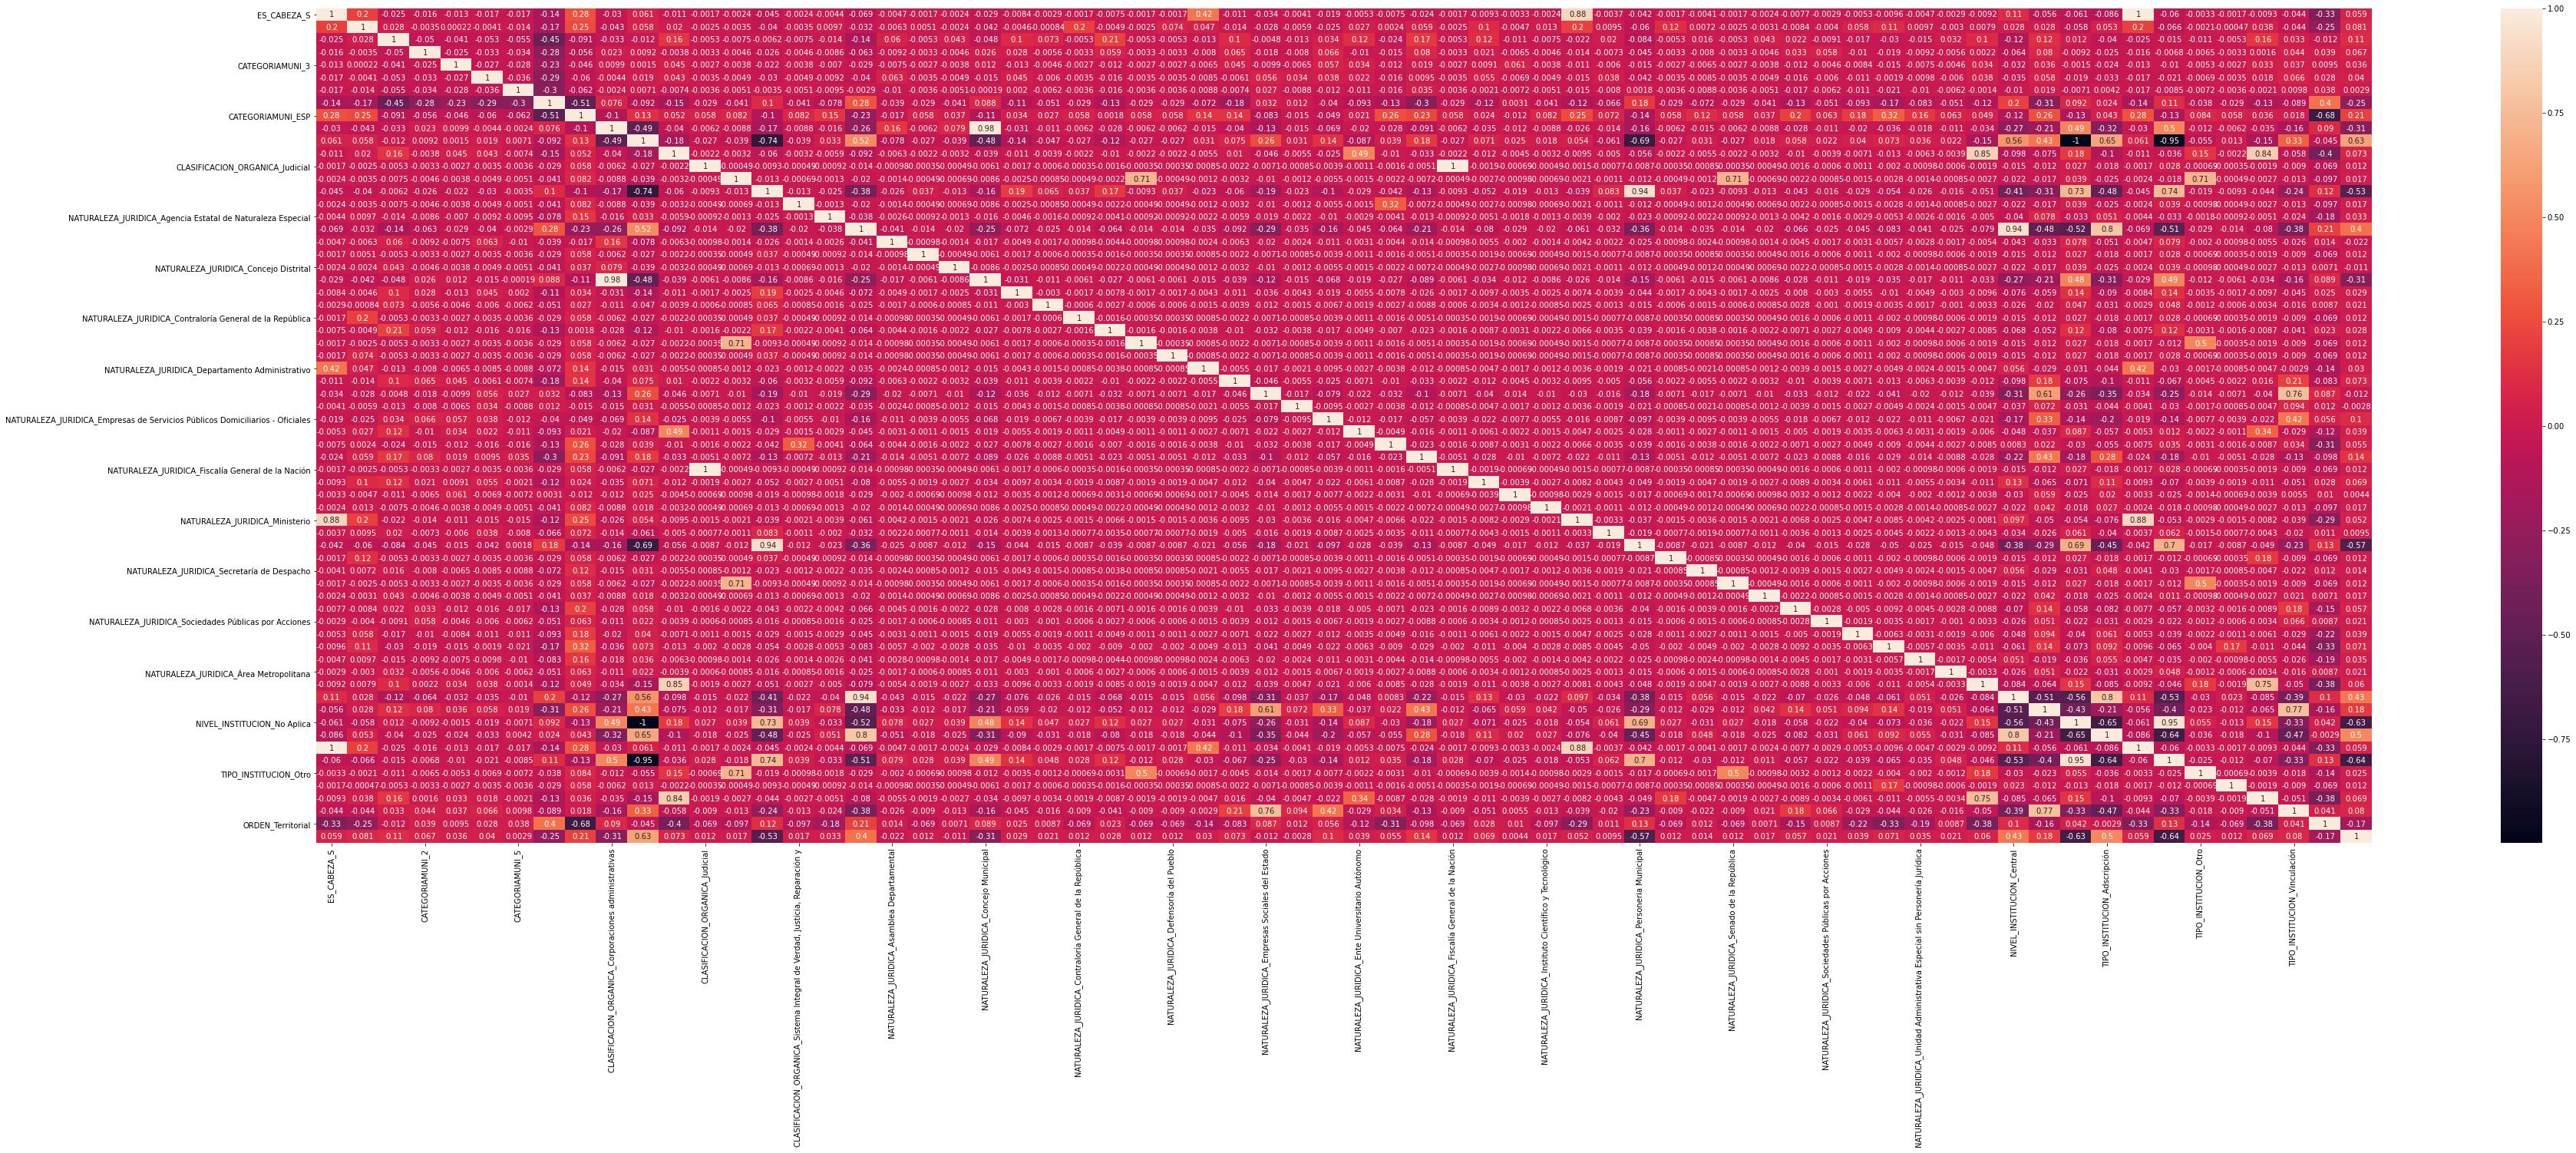

In [88]:
import seaborn as sn

corrMatrix = df3.corr()
corrMatrix.to_excel('corrMatrix.xlsx', sheet_name='example')
sn.heatmap(corrMatrix, annot=True)
plt.gcf().set_size_inches(60, 20)
plt.show()

In [89]:
# Hay variables que tienen una baja correlacion con la variable objetivo eliminarlas

df3 = df3.drop(['ES_CABEZA_S',  'TOTAL_PLANTAS',  'CATEGORIAMUNI_2',  'CATEGORIAMUNI_3',  'CATEGORIAMUNI_4',  'CATEGORIAMUNI_5',  'CLASIFICACION_ORGANICA_Entes autónomos',  'CLASIFICACION_ORGANICA_Judicial',  'CLASIFICACION_ORGANICA_Legislativa',  'CLASIFICACION_ORGANICA_Sistema Integral de Verdad, Justicia, Reparación y',  'NATURALEZA_JURIDICA_Agencia Estatal de Naturaleza Especial',  'NATURALEZA_JURIDICA_Asamblea Departamental',  'NATURALEZA_JURIDICA_Auditoría General de la República',  
                'NATURALEZA_JURIDICA_Concejo Distrital',  'NATURALEZA_JURIDICA_Contraloría Departamental',  'NATURALEZA_JURIDICA_Contraloría Distrital',  'NATURALEZA_JURIDICA_Contraloría General de la República',  'NATURALEZA_JURIDICA_Contraloría Municipal',  'NATURALEZA_JURIDICA_Cámara de Representantes', 
                'NATURALEZA_JURIDICA_Defensoría del Pueblo',  'NATURALEZA_JURIDICA_Departamento Administrativo',  'NATURALEZA_JURIDICA_Empresas Industriales y Comerciales del Estado',  'NATURALEZA_JURIDICA_Empresas Sociales del Estado',  'NATURALEZA_JURIDICA_Empresas de Servicios Públicos Domiciliarios - Mixtas',  
                'NATURALEZA_JURIDICA_Ente Universitario Autónomo',  'NATURALEZA_JURIDICA_Especial',  'NATURALEZA_JURIDICA_Fiscalía General de la Nación',  'NATURALEZA_JURIDICA_Gobernación',  'NATURALEZA_JURIDICA_Institución prestadora de servicios de salid',  'NATURALEZA_JURIDICA_Instituto Científico y Tecnológico',  'NATURALEZA_JURIDICA_Ministerio',  'NATURALEZA_JURIDICA_Personeria Distrital',  'NATURALEZA_JURIDICA_Procuraduría General de la Nación',  'NATURALEZA_JURIDICA_Secretaría de Despacho',  
                'NATURALEZA_JURIDICA_Senado de la República',  'NATURALEZA_JURIDICA_Sociedad Anónima',  'NATURALEZA_JURIDICA_Sociedad de Economía Mixta',  'NATURALEZA_JURIDICA_Sociedades Públicas por Acciones',  'NATURALEZA_JURIDICA_Superintendencia con Personería Jurídica',  'NATURALEZA_JURIDICA_Unidad Administrativa Especial con Personería Jurídica',  'NATURALEZA_JURIDICA_Unidad Administrativa Especial sin Personería Jurídica',  'NATURALEZA_JURIDICA_Área Metropolitana',  'NATURALEZA_JURIDICA_Órganos autónomos', 
                'TIPO_INSTITUCION_Cabeza',  'TIPO_INSTITUCION_Otro',  'TIPO_INSTITUCION_Regional/Dependencia',  'TIPO_INSTITUCION_Régimen Autónomo',  'TIPO_INSTITUCION_Vinculación'], axis=1)

In [90]:
Y = df3[['Debe reportar_SI']]
X = df3.drop(['Debe reportar_SI'], axis=1)

In [91]:

from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()
X[:] = min_max_scaler.fit_transform(X)

print(X)

      CATEGORIAMUNI_1  CATEGORIAMUNI_6  CATEGORIAMUNI_ESP  \
3                 0.0              1.0                0.0   
5                 0.0              1.0                0.0   
15                1.0              0.0                0.0   
16                0.0              1.0                0.0   
18                0.0              1.0                0.0   
...               ...              ...                ...   
6396              0.0              1.0                0.0   
6398              1.0              0.0                0.0   
6399              0.0              1.0                0.0   
6400              0.0              1.0                0.0   
6401              0.0              1.0                0.0   

      CLASIFICACION_ORGANICA_Corporaciones administrativas  \
3                                                   0.0      
5                                                   0.0      
15                                                  0.0      
16                 

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

Confusion matrix:
[[207  58]
 [ 52 551]]


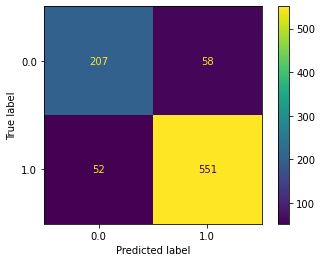

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

SEED = 42
random_forest_model_0 = RandomForestClassifier(n_estimators = 1, random_state = SEED)
# Entrenamos con imágenes aplanadas
random_forest_model_0.fit(X_train, y_train.values.ravel())

predicted = random_forest_model_0.predict(X_test)

print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test.values.ravel(), predicted))

plot_confusion_matrix(random_forest_model_0, X_test, y_test)  
plt.show()

Precisión por píxel: 85.94%
Confusion matrix:
[[209  56]
 [ 66 537]]


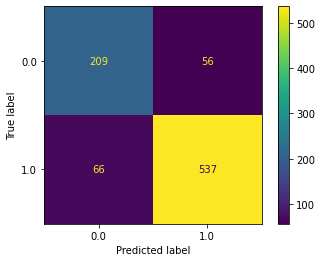

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn_model_feat = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_model_feat.fit(X_train, y_train.values.ravel())
acc = knn_model_feat.score(X_test, y_test.values.ravel())
print("Precisión por píxel: {:.2f}%".format(acc * 100))

predicted = knn_model_feat.predict(X_test)

print("Confusion matrix:\n%s" % confusion_matrix(y_test.values.ravel(), predicted))

plot_confusion_matrix(knn_model_feat, X_test, y_test)  
plt.show()

**Predicción valores futuros ley de cuotas**

In [3]:
dfLR=pd.read_excel('historico.xlsx')

In [4]:
y = dfLR['part'].to_numpy()
X = dfLR['anno'].to_numpy().reshape((-1, 1))

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)
y_predicted = model.predict(X)
print("Para 2022 Ley de cuotas es de:",model.predict(np.array([2022]).reshape(-1, 1)))

from sklearn.metrics import r2_score
print("Coeficiente de determinación:", r2_score(y_predicted, y))

Para 2022 Ley de cuotas es de: [0.47323831]
Coeficiente de determinación: 0.6370429693466295


In [10]:
model.predict(np.array([[2022],[2023],[2024],[2025]]).reshape(-1, 1))
fut=np.array([[2022],[2023],[2024],[2025]]).reshape(-1, 1)
pt=model.predict(fut)

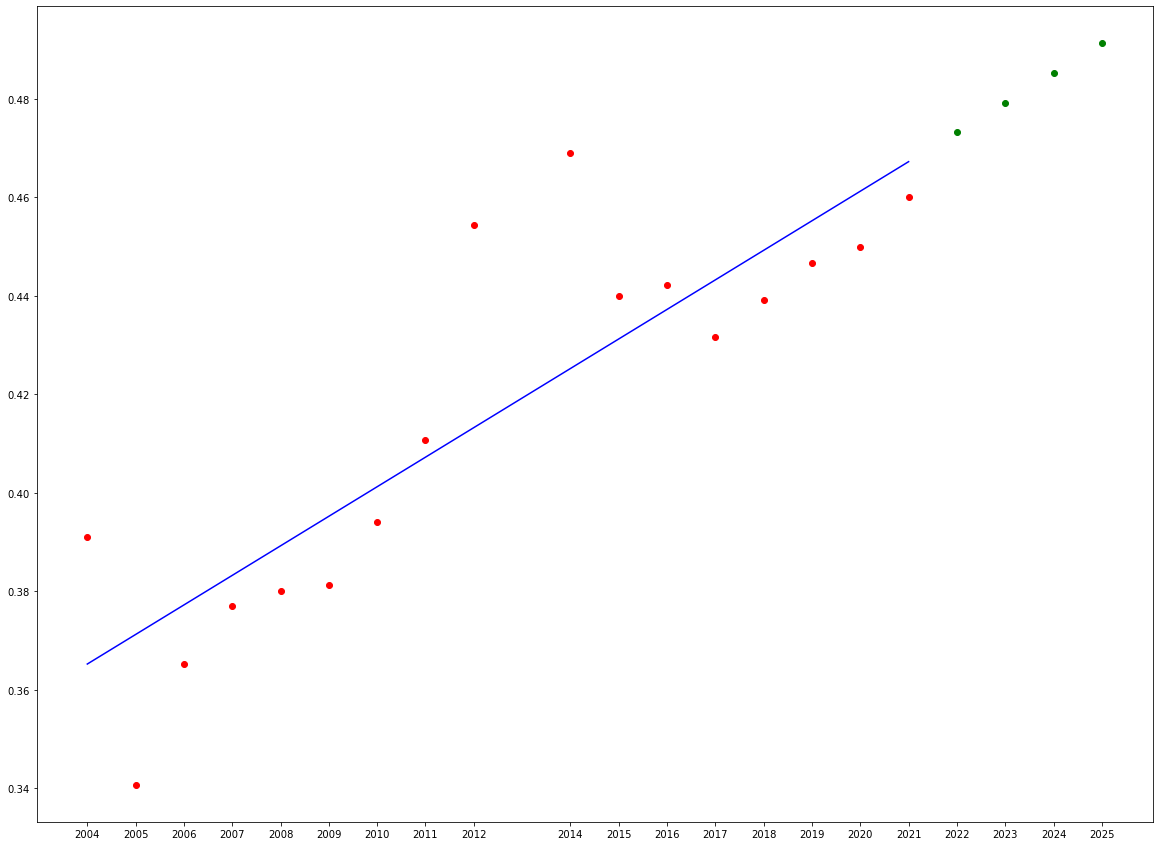

In [13]:
def viz_linear():
    plt.rcParams["figure.figsize"] = (20,15)
    plt.scatter(X, y, color='red')
    plt.scatter(fut, pt, color='green')
    plt.plot(X, model.predict(X), color='blue')
    plt.xticks([2004,2005,2006,2007,2008,2009,2010,2011,2012,2014,2015,2016, 2017, 2018, 2019, 2020,2021,2022,2023,2024,2025])
    plt.show()
    return
viz_linear()